#**Import Library**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import lite
from tensorflow import keras
from keras import backend as K
from keras.layers import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

In [ ]:
# connect GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Image Preparation (Load Dataset)**

In [ ]:
train_path = '/content/drive/MyDrive/Colab Notebooks/db-kck-rgb/tanpa-augmentasi/train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/db-kck-rgb/tanpa-augmentasi/valid'
test_path = '/content/drive/MyDrive/Colab Notebooks/db-kck-rgb/tanpa-augmentasi/test'

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet_v2.preprocess_input).flow_from_directory(
    train_path, target_size=(224,224), batch_size=10, class_mode='categorical')
valid_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet_v2.preprocess_input).flow_from_directory(
    valid_path, target_size=(224,224), batch_size=10, class_mode='categorical')
test_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet_v2.preprocess_input).flow_from_directory(
    test_path, target_size=(224,224), batch_size=10, shuffle=False, class_mode='categorical')


Found 415 images belonging to 3 classes.
Found 114 images belonging to 3 classes.
Found 57 images belonging to 3 classes.


In [ ]:
print("Shape train_batches:", train_batches[0][0].shape)
print("Shape valid_batches:", valid_batches[0][0].shape)
print("Shape test_batches:", test_batches[0][0].shape)

Shape train_batches: (10, 224, 224, 3)
Shape valid_batches: (10, 224, 224, 3)
Shape test_batches: (10, 224, 224, 3)


#**Modify Model**

In [ ]:
mobile = MobileNetV2(weights='imagenet')

14536120/14536120 [==============================] - 2s 0us/step


In [ ]:
mobile.summary()

In [ ]:
x = mobile.layers[-1].output
predictions = Dense(3, activation='softmax')(x)
model = Model(inputs=mobile.input, outputs=predictions)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

#**Train the model**

In [ ]:
model.compile(Adam(learning_rate=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_batches, validation_data = valid_batches, epochs=30, verbose=2)

Epoch 1/30
42/42 - 2s - loss: 0.8130 - accuracy: 0.9952 - val_loss: 0.8441 - val_accuracy: 0.9298 - 2s/epoch - 59ms/step
Epoch 2/30
42/42 - 3s - loss: 0.8093 - accuracy: 0.9952 - val_loss: 0.8418 - val_accuracy: 0.9211 - 3s/epoch - 61ms/step
Epoch 3/30
42/42 - 3s - loss: 0.8066 - accuracy: 0.9904 - val_loss: 0.8235 - val_accuracy: 0.9561 - 3s/epoch - 75ms/step
Epoch 4/30
42/42 - 2s - loss: 0.8057 - accuracy: 0.9831 - val_loss: 0.8147 - val_accuracy: 0.9649 - 2s/epoch - 55ms/step
Epoch 5/30
42/42 - 3s - loss: 0.7986 - accuracy: 0.9904 - val_loss: 0.7975 - val_accuracy: 0.9912 - 3s/epoch - 60ms/step
Epoch 6/30
42/42 - 2s - loss: 0.7902 - accuracy: 1.0000 - val_loss: 0.7957 - val_accuracy: 0.9825 - 2s/epoch - 55ms/step
Epoch 7/30
42/42 - 2s - loss: 0.7929 - accuracy: 0.9855 - val_loss: 0.7966 - val_accuracy: 0.9737 - 2s/epoch - 56ms/step
Epoch 8/30
42/42 - 3s - loss: 0.7831 - accuracy: 0.9976 - val_loss: 0.7902 - val_accuracy: 0.9825 - 3s/epoch - 76ms/step
Epoch 9/30
42/42 - 2s - loss: 0.

#**Menampilkan Grafik Training**

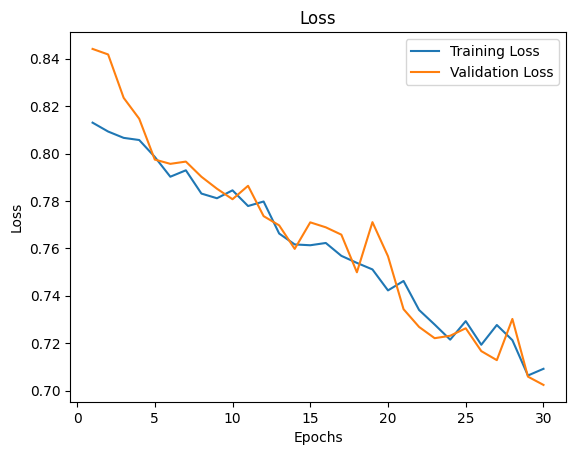

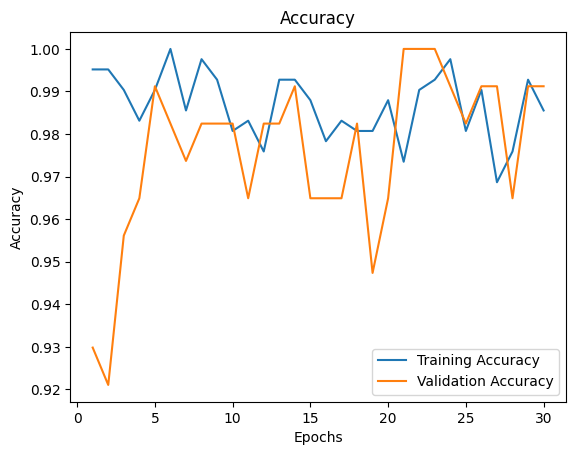

In [ ]:
# Menampilkan loss dan akurasi training
train_loss = history.history['loss']
train_acc = history.history['accuracy']

# Menampilkan loss dan akurasi validasi
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

# Menampilkan grafik loss
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Menampilkan grafik akurasi
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_labels = test_batches.classes

In [ ]:
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [ ]:
test_batches.class_indices

{'lubang': 0, 'noda': 1, 'tidak-cacat': 2}

#**Testing the model**

In [ ]:
predictions = model.predict(test_batches, verbose=0)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confutsion Matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalized=True'.
  """
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.tittle=(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix without normalization")
  print(cm)

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i,j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')


In [ ]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

Confusion matrix without normalization
[[19  0  0]
 [ 0 19  0]
 [ 0  0 19]]


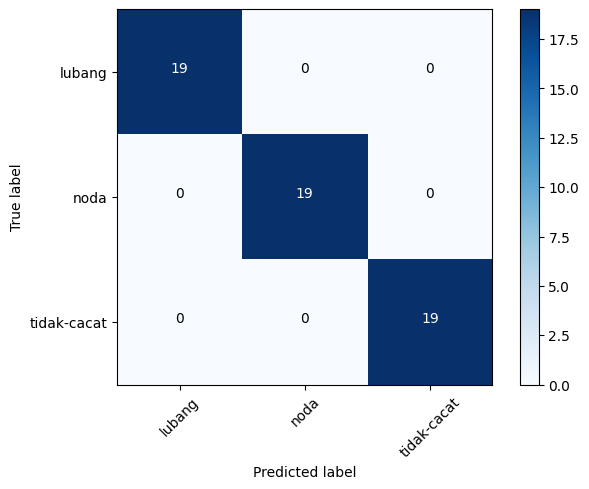

In [ ]:
cm_plot_labels = ['lubang', 'noda', 'tidak-cacat']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

#**MENGHITUNG AKURASI**

In [ ]:
pred_labels = predictions.argmax(axis=1)

# Menampilkan pred_labels
print(pred_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# pred_labels: array label prediksi
# test_labels: array label ground truth
accuracy = accuracy_score(test_labels, pred_labels)

# menghitung F1-score, recall dan precision
report = classification_report(test_labels, pred_labels)

print("Akurasi: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", report)

Akurasi: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        19

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



#**SAVE MODEL**

In [ ]:
save_path = '/content/drive/MyDrive/Colab Notebooks/tugas-akhir/mobilenetv2-home/save-model/v2-RGB-epoch30(100%).h5'
model.save(save_path)

#**CONVERT MODEL (.tflite)**

In [ ]:
model_h5 = tf.keras.models.load_model(save_path)

# Membuat konverter
converter = lite.TFLiteConverter.from_keras_model(model_h5)

# Mengonversi model
tflite_model = converter.convert()

# Menyimpan model
with open('/content/drive/MyDrive/Colab Notebooks/tugas-akhir/mobilenetv2-home/save-model/v2-RGB-epoch30(100%).tflite', 'wb') as f:
    f.write(tflite_model)